Import Data

# **Pra Proses**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('hargaEmas.xlsx')
data.index=data.index + 1
jumlah_data = data.shape[0]
print(data.dtypes)
print("jumlah data =", jumlah_data)
data_interpolasi = data.interpolate(method='linear', axis=0)

Tanggal    datetime64[ns]
Harga             float64
dtype: object
jumlah data = 300


In [ ]:
data_interpolasi.head()

,Tanggal,Harga
1,2024-03-14,1203000.0
2,2024-03-15,1194000.0
3,2024-03-16,1193000.0
4,2024-03-17,1193000.0
5,2024-03-18,1193000.0


plot data

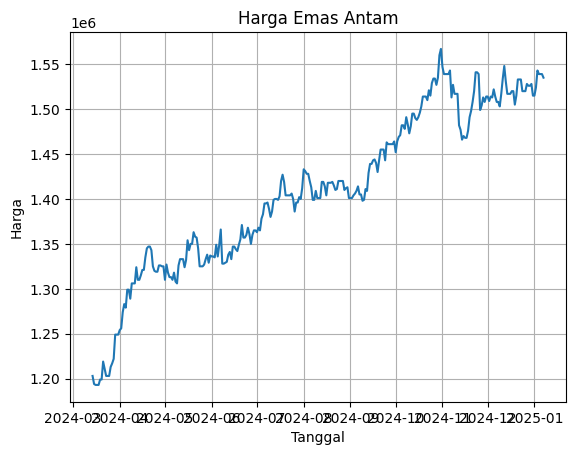

In [ ]:
plt.plot(data_interpolasi['Tanggal'], data_interpolasi['Harga'])
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Harga Emas Antam')
plt.grid(True)
plt.show()

In [ ]:
# install lib pemodelan ARIMA
!pip install pmdarima==2.0.3

# **Split data 90:10**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data_interpolasi' is your DataFrame
X = data_interpolasi.drop('Harga', axis=1)  # Features (all columns except 'Harga')
y = data_interpolasi['Harga']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # 90:10 split

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (270, 1)
X_test shape: (30, 1)
y_train shape: (270,)
y_test shape: (30,)


In [ ]:
# Uji ADF
from statsmodels.tsa.stattools import adfuller
result = adfuller(y_train)

# Menampilkan hasil dan interpretasi dengan alpha = 0.01
print('ADF Statistic: %f' % result[0])
print('p-value: {:.30f}'.format(float(result[1])))
print(f'p-value: {result[1]:.10f}')
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

alpha = 0.01
if result[1] < alpha:
    print('\nData stasioner (p-value < alpha)')
else:
    print('\nData tidak stasioner (p-value >= alpha)')

ADF Statistic: -16.477689
p-value: 0.000000000000000000000000000023
p-value: 0.0000000000
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573

Data stasioner (p-value < alpha)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# Define p, d, and q ranges for auto_arima
p_values = range(0, 5)  # Example: Test p values from 0 to 2
d_values = range(0, 5)  # Example: Test d values from 0 to 1
q_values = range(0, 5)  # Example: Test q values from 0 to 2

# Use the defined ranges in auto_arima
model = auto_arima(y_train,
                   seasonal=False,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True, # Use stepwise search for efficiency
                   start_p=min(p_values),
                   start_q=min(q_values),
                   max_p=max(p_values),
                   max_q=max(q_values),
                   d=1, # Assuming d=1, adjust if ADF test result is different
                   D=0, # Non-seasonal
                   m=1, # Assuming no seasonality (m=1), adjust if applicable
                   information_criterion='aic') # Use AIC for model selection

model_fit = model.fit(y_train)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7093.318, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7059.566, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7022.528, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7091.323, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7016.590, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7017.192, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7025.904, Time=0.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7020.456, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7042.420, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7026.761, Time=1.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7015.535, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7021.307, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7057.585, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7016.051, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7024.936, Time=1.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7019.431, Time=0.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7040.489, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=7024.398, Time=4.09 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 11.524 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  270
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3504.768
Date:                Fri, 17 Jan 2025   AIC                           7015.535
Time:                        03:03:32   BIC                           7026.319
Sample:                             0   HQIC                          7019.866
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2071      0.030      6.822      0.000       0.148       0.267
ma.L1         -0.8922      0.027    -32.461      0.000      -0.946      -0.838
sigma2      1.031e+10   1.32e-12   7.81e+21      0.0

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

predictions_train = model_fit.predict(n_periods=len(y_train))

# Menghitung MAPE pada data training
mape_train = mean_absolute_percentage_error(y_train, predictions_train)
print(f"MAPE pada data training: , {mape_train * 100:.2f}%")

MAPE pada data training: , 5.34%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Forecasting untuk periode waktu data test
forecast_test = model_fit.predict(n_periods=len(y_test))  # Prediksi untuk 108 sampel

# Menghitung MAPE pada data test
mape_test = mean_absolute_percentage_error(y_test, forecast_test[:len(y_test)])  # Menggunakan len(y_test) sampel pertama dari forecast_test

# Menampilkan hasil MAPE pada data test
print(f"MAPE pada data test:, {mape_test * 100:.2f}%")

MAPE pada data test:, 5.78%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# melakukan prediksi pada data train

y_pred_train = model_fit.predict(n_periods=len(y_train))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MAPE on the test data: 5.78%


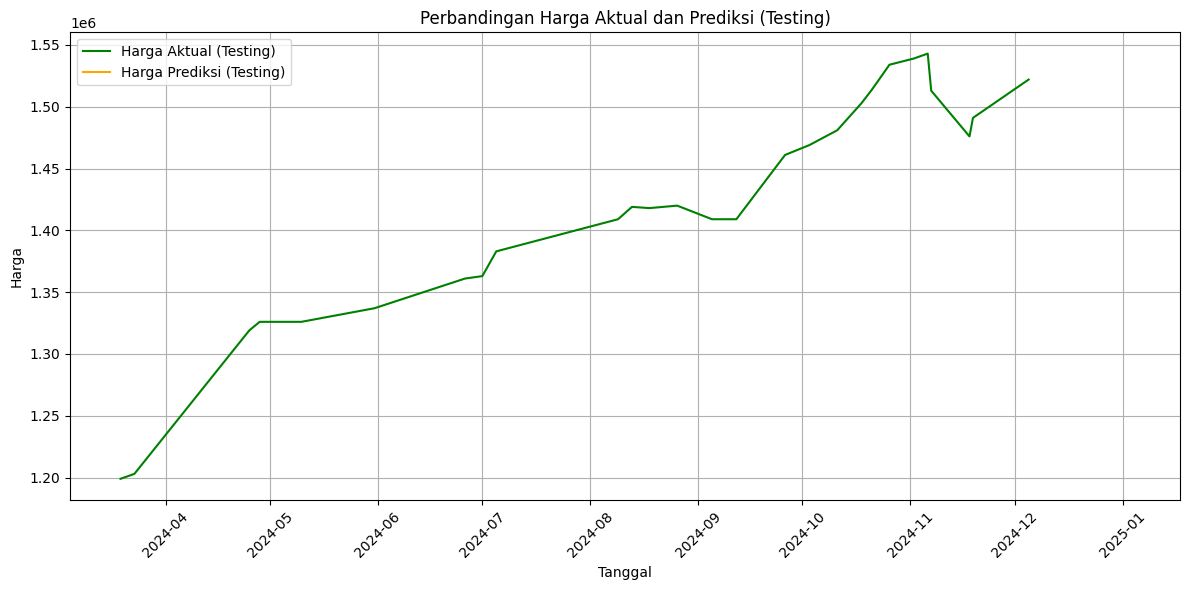

In [ ]:
# prompt: lakukan forecast pada data test

# Forecasting for the test data
forecast = model_fit.predict(n_periods=len(y_test))

# Calculate MAPE on the test data
mape_test = mean_absolute_percentage_error(y_test, forecast)

# Display the MAPE on the test data
print(f"MAPE on the test data: {mape_test * 100:.2f}%")

# Create a DataFrame for plotting
plot_data_test = pd.DataFrame({
    'Tanggal': X_test['Tanggal'],
    'Harga_Aktual': y_test,
    'Harga_Prediksi': forecast
})

# Plotting
plt.figure(figsize=(12, 6))

# Plot testing data
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Aktual'], label='Harga Aktual (Testing)', color='green')
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Prediksi'], label='Harga Prediksi (Testing)', color='orange')

plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Perbandingan Harga Aktual dan Prediksi (Testing)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

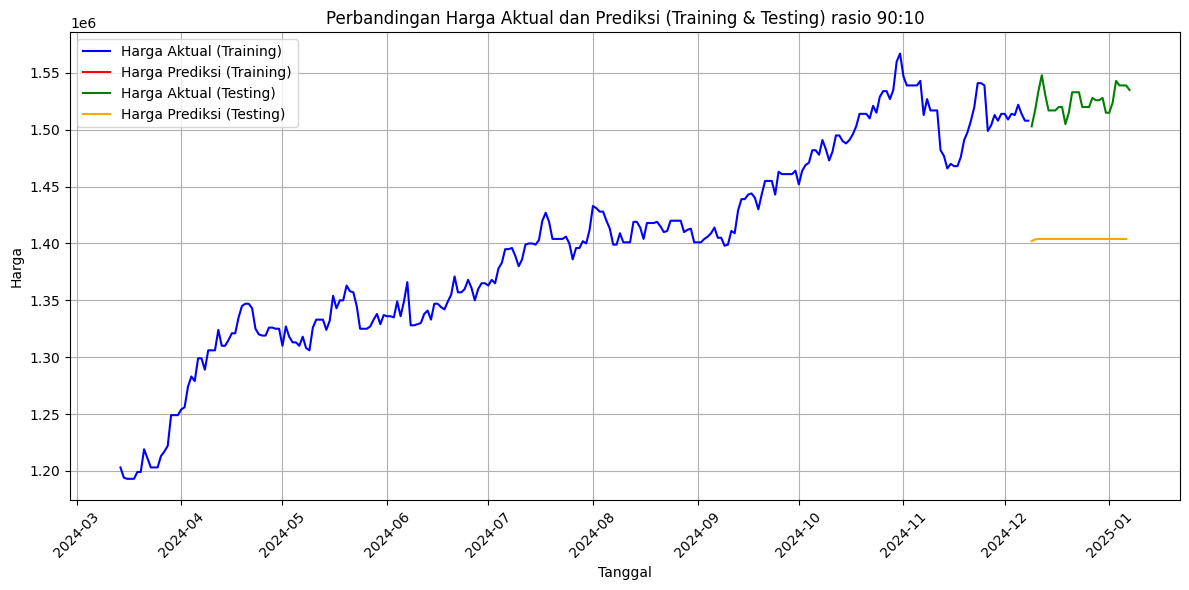

In [ ]:
# Split data with shuffle=False to maintain date order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# ... (your existing code for model training and prediction)

# Create DataFrames for plotting
plot_data_train = pd.DataFrame({
    'Tanggal': X_train['Tanggal'],
    'Harga_Aktual': y_train,
    'Harga_Prediksi': y_pred_train
})

plot_data_test = pd.DataFrame({
    'Tanggal': X_test['Tanggal'],
    'Harga_Aktual': y_test,
    'Harga_Prediksi': forecast
})

# Plotting
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(plot_data_train['Tanggal'], plot_data_train['Harga_Aktual'], label='Harga Aktual (Training)', color='blue')
plt.plot(plot_data_train['Tanggal'], plot_data_train['Harga_Prediksi'], label='Harga Prediksi (Training)', color='red')

# Plot testing data
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Aktual'], label='Harga Aktual (Testing)', color='green')
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Prediksi'], label='Harga Prediksi (Testing)', color='orange')

plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Perbandingan Harga Aktual dan Prediksi (Training & Testing) rasio 90:10')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Split data 80:20**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data_interpolasi' is your DataFrame
X = data_interpolasi.drop('Harga', axis=1)  # Features (all columns except 'Harga')
y = data_interpolasi['Harga']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80:20 split

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240, 1)
X_test shape: (60, 1)
y_train shape: (240,)
y_test shape: (60,)


In [ ]:
# Uji ADF
from statsmodels.tsa.stattools import adfuller
result = adfuller(y_train)

# Menampilkan hasil dan interpretasi dengan alpha = 0.01
print('ADF Statistic: %f' % result[0])
print('p-value: {:.30f}'.format(float(result[1])))
print(f'p-value: {result[1]:.10f}')
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

alpha = 0.01
if result[1] < alpha:
    print('\nData stasioner (p-value < alpha)')
else:
    print('\nData tidak stasioner (p-value >= alpha)')

ADF Statistic: -5.318471
p-value: 0.000005013310165423223671327547
p-value: 0.0000050133
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573

Data stasioner (p-value < alpha)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# Define p, d, and q ranges for auto_arima
p_values = range(0, 5)  # Example: Test p values from 0 to 2
d_values = range(0, 5)  # Example: Test d values from 0 to 1
q_values = range(0, 5)  # Example: Test q values from 0 to 2

# Use the defined ranges in auto_arima
model = auto_arima(y_train,
                   seasonal=False,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True, # Use stepwise search for efficiency
                   start_p=min(p_values),
                   start_q=min(q_values),
                   max_p=max(p_values),
                   max_q=max(q_values),
                   d=1, # Assuming d=1, adjust if ADF test result is different
                   D=0, # Non-seasonal
                   m=1, # Assuming no seasonality (m=1), adjust if applicable
                   information_criterion='aic') # Use AIC for model selection

model_fit = model.fit(y_train)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6298.346, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6253.341, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6213.965, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6296.358, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6211.446, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6213.491, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6218.782, Time=1.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6214.008, Time=2.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6231.267, Time=1.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6221.743, Time=1.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6210.338, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6212.368, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6251.342, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6212.209, Time=0.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=6217.651, Time=0.87 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6212.846, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6229.348, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6220.692, Time=1.15 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 11.555 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3102.169
Date:                Fri, 17 Jan 2025   AIC                           6210.338
Time:                        02:59:40   BIC                           6220.768
Sample:                             0   HQIC                          6214.541
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1691      0.038      4.455      0.000       0.095       0.243
ma.L1         -0.9074      0.033    -27.177      0.000      -0.973      -0.842
sigma2      1.019e+10   6.23e-13   1.63e+22      0.0

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

predictions_train = model_fit.predict(n_periods=len(y_train))

# Menghitung MAPE pada data training
mape_train = mean_absolute_percentage_error(y_train, predictions_train)
print(f"MAPE pada data training: , {mape_train * 100:.2f}%")

MAPE pada data training: , 5.25%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Forecasting untuk periode waktu data test
forecast_test = model_fit.predict(n_periods=len(y_test))

# Menghitung MAPE pada data test
mape_test = mean_absolute_percentage_error(y_test, forecast_test[:len(y_test)])  # Menggunakan len(y_test) sampel pertama dari forecast_test

# Menampilkan hasil MAPE pada data test
print(f"MAPE pada data test:, {mape_test * 100:.2f}%")

MAPE pada data test:, 5.92%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# melakukan prediksi pada data train

y_pred_train = model_fit.predict(n_periods=len(y_train))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MAPE on the test data: 5.92%


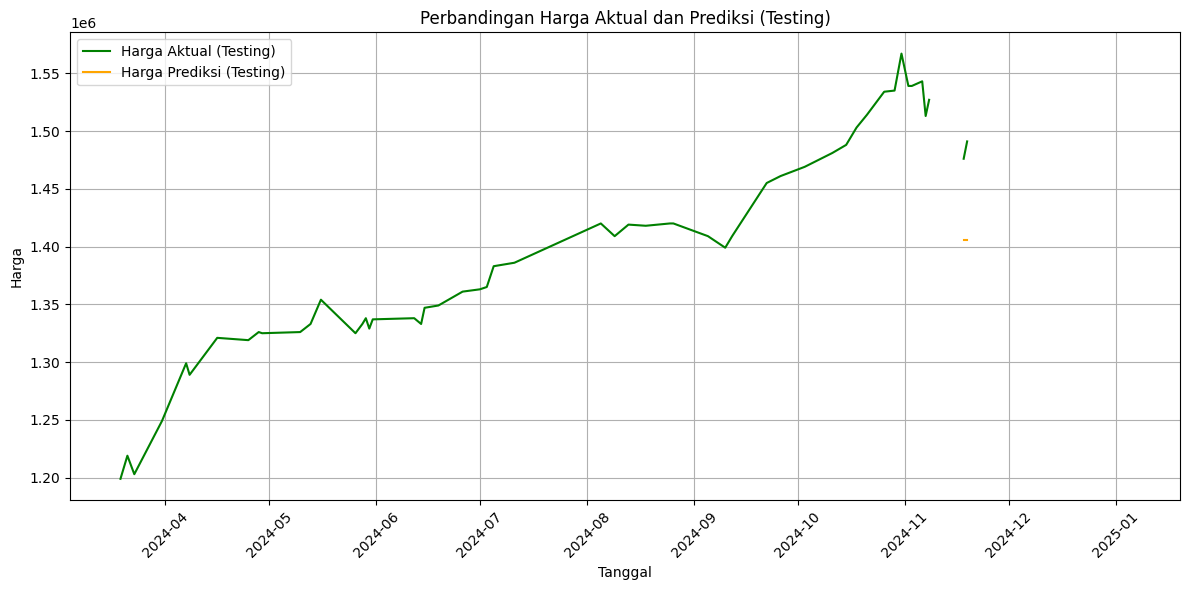

In [ ]:
# prompt: lakukan forecast pada data test

# Forecasting for the test data
forecast = model_fit.predict(n_periods=len(y_test))

# Calculate MAPE on the test data
mape_test = mean_absolute_percentage_error(y_test, forecast)

# Display the MAPE on the test data
print(f"MAPE on the test data: {mape_test * 100:.2f}%")

# Create a DataFrame for plotting
plot_data_test = pd.DataFrame({
    'Tanggal': X_test['Tanggal'],
    'Harga_Aktual': y_test,
    'Harga_Prediksi': forecast
})

# Plotting
plt.figure(figsize=(12, 6))

# Plot testing data
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Aktual'], label='Harga Aktual (Testing)', color='green')
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Prediksi'], label='Harga Prediksi (Testing)', color='orange')

plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Perbandingan Harga Aktual dan Prediksi (Testing)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

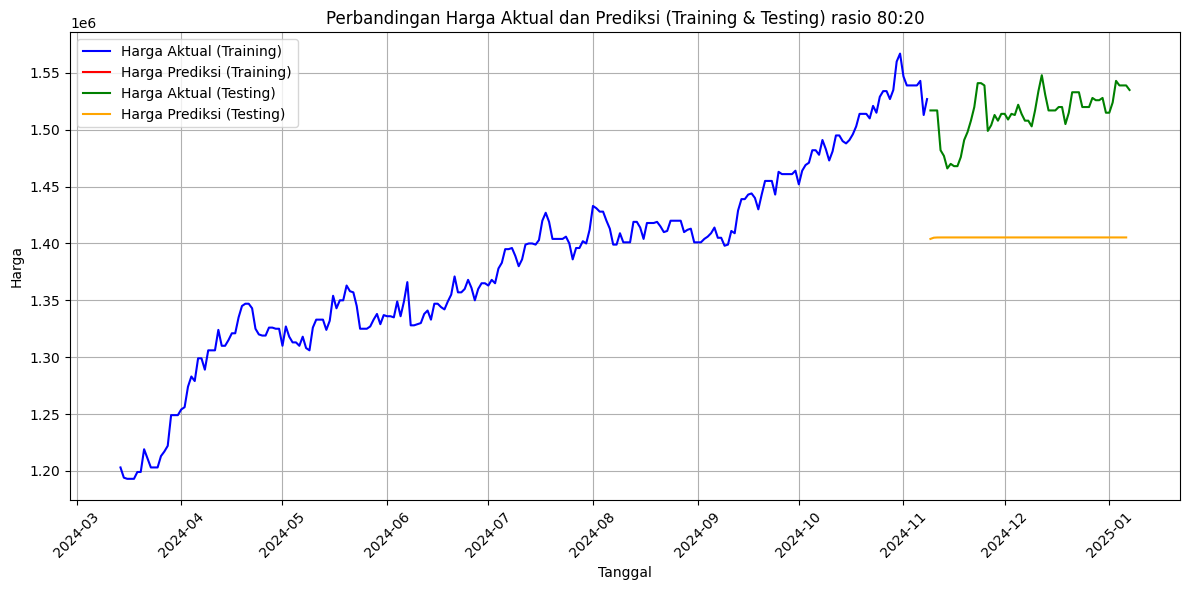

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ... (your existing code for model training and prediction)

# Create DataFrames for plotting
plot_data_train = pd.DataFrame({
    'Tanggal': X_train['Tanggal'],
    'Harga_Aktual': y_train,
    'Harga_Prediksi': y_pred_train
})

plot_data_test = pd.DataFrame({
    'Tanggal': X_test['Tanggal'],
    'Harga_Aktual': y_test,
    'Harga_Prediksi': forecast
})

# Plotting
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(plot_data_train['Tanggal'], plot_data_train['Harga_Aktual'], label='Harga Aktual (Training)', color='blue')
plt.plot(plot_data_train['Tanggal'], plot_data_train['Harga_Prediksi'], label='Harga Prediksi (Training)', color='red')

# Plot testing data
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Aktual'], label='Harga Aktual (Testing)', color='green')
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Prediksi'], label='Harga Prediksi (Testing)', color='orange')

plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Perbandingan Harga Aktual dan Prediksi (Training & Testing) rasio 80:20')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Split Data 70:30**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data_interpolasi' is your DataFrame
X = data_interpolasi.drop('Harga', axis=1)  # Features (all columns except 'Harga')
y = data_interpolasi['Harga']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42) # 70:30 split

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (210, 1)
X_test shape: (90, 1)
y_train shape: (210,)
y_test shape: (90,)


In [ ]:
# Uji ADF
from statsmodels.tsa.stattools import adfuller
result = adfuller(y_train)

# Menampilkan hasil dan interpretasi dengan alpha = 0.01
print('ADF Statistic: %f' % result[0])
print('p-value: {:.30f}'.format(float(result[1])))
print(f'p-value: {result[1]:.10f}')
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

alpha = 0.01
if result[1] < alpha:
    print('\nData stasioner (p-value < alpha)')
else:
    print('\nData tidak stasioner (p-value >= alpha)')

ADF Statistic: -14.610462
p-value: 0.000000000000000000000000004031
p-value: 0.0000000000
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574

Data stasioner (p-value < alpha)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# Define p, d, and q ranges for auto_arima
p_values = range(0, 5)  # Example: Test p values from 0 to 2
d_values = range(0, 5)  # Example: Test d values from 0 to 1
q_values = range(0, 5)  # Example: Test q values from 0 to 2

# Use the defined ranges in auto_arima
model = auto_arima(y_train,
                   seasonal=False,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True, # Use stepwise search for efficiency
                   start_p=min(p_values),
                   start_q=min(q_values),
                   max_p=max(p_values),
                   max_q=max(q_values),
                   d=1, # Assuming d=1, adjust if ADF test result is different
                   D=0, # Non-seasonal
                   m=1, # Assuming no seasonality (m=1), adjust if applicable
                   information_criterion='aic') # Use AIC for model selection

model_fit = model.fit(y_train)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5505.111, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5473.758, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5457.718, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5503.115, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5451.737, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5453.820, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5459.451, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5454.588, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5465.755, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5448.794, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5455.338, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5471.766, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5450.845, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5458.342, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5453.138, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5463.786, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5460.541, Time=0.36 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.308 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2721.397
Date:                Fri, 17 Jan 2025   AIC                           5448.794
Time:                        02:55:41   BIC                           5458.821
Sample:                             0   HQIC                          5452.848
                                - 210                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2437      0.036      6.777      0.000       0.173 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

predictions_train = model_fit.predict(n_periods=len(y_train))

# Menghitung MAPE pada data training
mape_train = mean_absolute_percentage_error(y_train, predictions_train)
print(f"MAPE pada data training: , {mape_train * 100:.2f}%")

MAPE pada data training: , 5.18%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Forecasting untuk periode waktu data test
forecast_test = model_fit.predict(n_periods=len(y_test))  # Prediksi untuk 108 sampel

# Menghitung MAPE pada data test
mape_test = mean_absolute_percentage_error(y_test, forecast_test[:len(y_test)])  # Menggunakan len(y_test) sampel pertama dari forecast_test

# Menampilkan hasil MAPE pada data test
print(f"MAPE pada data test:, {mape_test * 100:.2f}%")

MAPE pada data test:, 5.87%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# melakukan prediksi pada data train

y_pred_train = model_fit.predict(n_periods=len(y_train))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MAPE on the test data: 5.87%


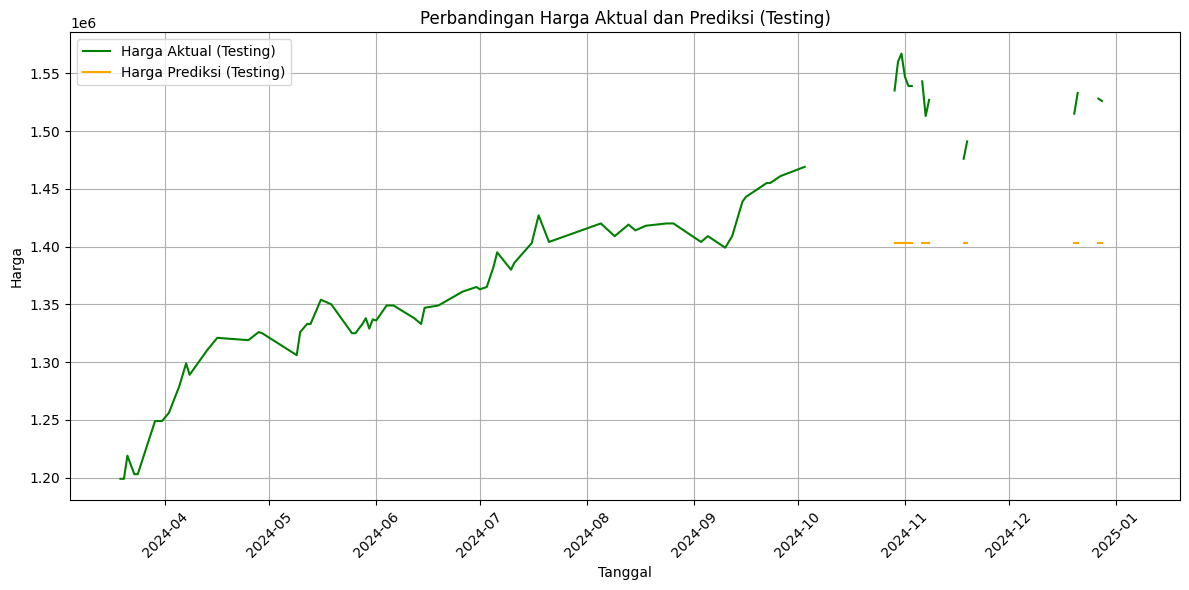

In [ ]:
# Forecasting for the test data
forecast = model_fit.predict(n_periods=len(y_test))

# Calculate MAPE on the test data
mape_test = mean_absolute_percentage_error(y_test, forecast)

# Display the MAPE on the test data
print(f"MAPE on the test data: {mape_test * 100:.2f}%")

# Create a DataFrame for plotting
plot_data_test = pd.DataFrame({
    'Tanggal': X_test['Tanggal'],
    'Harga_Aktual': y_test,
    'Harga_Prediksi': forecast
})

# Plotting
plt.figure(figsize=(12, 6))

# Plot testing data
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Aktual'], label='Harga Aktual (Testing)', color='green')
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Prediksi'], label='Harga Prediksi (Testing)', color='orange')

plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Perbandingan Harga Aktual dan Prediksi (Testing)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

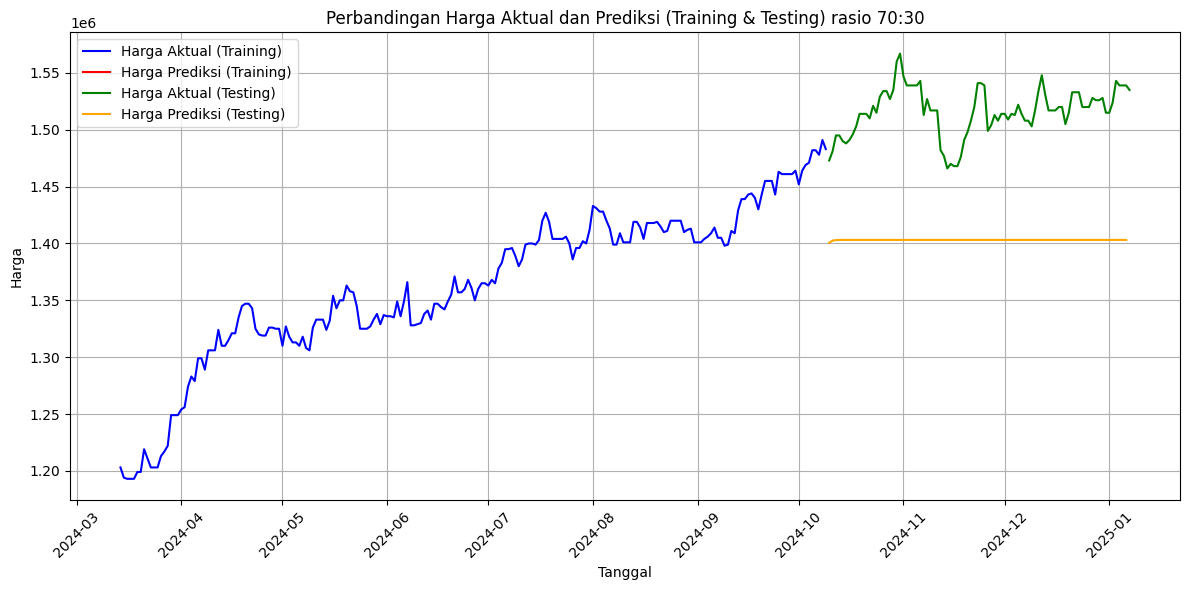

In [ ]:
# Split data with shuffle=False to maintain date order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# ... (your existing code for model training and prediction)

# Create DataFrames for plotting
plot_data_train = pd.DataFrame({
    'Tanggal': X_train['Tanggal'],
    'Harga_Aktual': y_train,
    'Harga_Prediksi': y_pred_train
})

plot_data_test = pd.DataFrame({
    'Tanggal': X_test['Tanggal'],
    'Harga_Aktual': y_test,
    'Harga_Prediksi': forecast
})

# Plotting
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(plot_data_train['Tanggal'], plot_data_train['Harga_Aktual'], label='Harga Aktual (Training)', color='blue')
plt.plot(plot_data_train['Tanggal'], plot_data_train['Harga_Prediksi'], label='Harga Prediksi (Training)', color='red')

# Plot testing data
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Aktual'], label='Harga Aktual (Testing)', color='green')
plt.plot(plot_data_test['Tanggal'], plot_data_test['Harga_Prediksi'], label='Harga Prediksi (Testing)', color='orange')

plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Perbandingan Harga Aktual dan Prediksi (Training & Testing) rasio 70:30')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()